<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 12**: Consider the one-dimensional, time-independent Schroedinger equation describing a particle with wave function $\psi(x)$ and energy $E$: $$-\frac{1}{2\,m_{e}}\,\frac{d^{2}\psi(x)}{dx^{2}} + V(x)\,\psi(x) = E\,\psi(x).$$ Values for the constant $m_{e}$ and others required for the calculation in natural(!) units are given in the code cell below. Natural units set $c=\hbar{}=1$ which means all masses and energies are in units of electron Volts \[eV\]. Length units change to \[1/eV\] and a conversion factor between \[m\] and \[1/eV\] is given.

**Tasks**: 

**(a)** Consider a square potential well with $V(x)=0$ in between two infinitely high walls separated by a distance $L$ equal to the Bohr radius, i.e. for all x in the interval $[0,L]$. Write a function `solve(energy, func)` which takes the parameter energy and a python function `func`. This function should solve the Schroedinger ODE for the case described above and return only the final value of $\psi(L)$ at the boundary $L$. 

Write a function `eqn(x, y, energy)` containing the two first-order differential equations equivalent to the Schroedinger equation. Use this function as input for the `solve(energy, func)` function. This detailed naming scheme is required for the first tests of your code.

Write a script using the function `solve(energy, func)` to calculate the ground state energy of an electron in this potential well in units of eV. For the initial condition, see technical hint below. For the number of values to solve for $\psi(x)$ the value 1000 is recommended.

The result of your calculation should be a number between 134 eV and 135 eV. One of the tests will assess your `solve(energy, func)` function for a distorted potential well.

**(b)** Consider the harmonic potential $$V(x)=V_{0}\,x^{2}/a^{2},$$ where $V_{0}$ and $a=10^{-11}$ m are constants (remember to convert \[m\] to \[1/eV\]). Limit the infinite range of the variable $x$ to the interval $[-10a, 10a]$ with $V_{0}=50$ eV. The harmonic oscillator is known to have equidistant energy eigenvalues. Check that this is true, to the precision of your calculation, by calculating the ground state and the first 2 excited states. (Hint: the ground state has energy in the range 100 to 200 eV. You may wish to program a different `solve2(energy)` function to part (a) for this exercise.)

In order to test your result, write a function `result()` which must return the difference of calculated energy eigenvalues in eV as a single number. As stated above, the absolute difference between the ground and first state and the first and second state should be very close to equal. Either of those two numbers should be returned. Consider that this is merely a function to enable automated testing and hence should really only return the requested value. Calculations should take place earlier in your code so that `result()` can run without an input argument.

**(c)** Plot the normalized wavefunctions, for the ground state energy and the two excited state energies as obtained without normalization in part (b). Note that normalization of a wavefunction requires the calculation of the integral of the square of the wavefunction $\int|\psi(x)|^{2}dx$ and subsequent division of $\psi(x)$ by the square root of the integral. 

Provide a plot with appropriate axis labels, plot all three wavefunctions onto a single canvas using color-coded lines and use x-axis values in units of \[m\], i.e. the original interval $[-10a, 10a]$.

**Technical Hint**: This is not an initial value problem for the Schroedinger ODE but a boundary value problem! This requires additional effort, a different method to the previous ODE exercises and is hence an 'unseen' problem. 

Take a simple initial condition for both problems at $x_{0}=0$ or $x_{0}=-10a$, respectively: $\psi(x_{0})=0$ and $d\psi(x_{0})/dx=1$. Use that as a starting point to solve the ODE and vary the energy, $E$, until a solution converges. The task is to evaluate the variation of the energy variable until the second boundary condition (for instance at L for exercise (a)) is satisfied since the first boundary condition is already satisfied due to the choice of initial condition. 

This requires an initial guess for the energy interval in which the solution might be and a computational method for root finding. Search scipy for root finding methods and select one which does not require knowledge of the derivative. Root finding is appropriate here since the boundary condition to satisfy is $\psi(x)=0$ to a given precision.

**Technical Hint 2**: part (a) requires using `solve_ivp` in order to solve the boundary value problem in combination with a root finder function. The SciPy boundary value solver, `solve_bvp`, can be used for parts (b) and (c), if you wish. The root finding, `solve_ivp` method will also work, however.

**Quantum physics background** For those lacking the first year quantum module, the boundary condition for both exercises is that $\psi(x)=0$ at each potential boundary. These are only fulfilled at specific, discrete energy values $E$, called energy eigenvalues, where the smallest of these is called the ground state energy.

In [2]:
''' required physical constants. Do not change.'''
from scipy.constants import c, m_e, eV, e
me_ev  = m_e*c**2/e          # mass m_e in [eV]

l_bohr = 5.2918e-11          # Bohr radius [m]
convert_length = 5067730.179 # convert [m] to [1/eV] in natural units
l_ev   = l_bohr * convert_length

# YOUR CODE HERE
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root

def solve(energy, func):
    xrange = np.linspace(0, l_ev, 1000)
    sol = solve_ivp(func, (0,l_ev), np.array([0,1]), t_eval = xrange, args = (energy))
    y = sol.y
    psi = y[0]
    return psi[-1]

#here y = [psi(x), psi'(x)] but I will define psi'(x) as u for simplicity
def eqn(x, y, energy):
    psi = y[0]
    u = y[1]
    return np.array([u, -2*me_ev*energy*psi])

"""
Plan: find an initial energy value, use a scipy function to test values around that until a psi(L) = zero is found 
"""

E0 = 134.5 #[eV]
sol = root(solve, E0, args = (eqn))
GSE = sol.x #[eV] note this is a 1d array.

print (GSE)

[134.17736066]


137.98750497098527
413.9228873403036
689.9156166508945
275.99272931059096


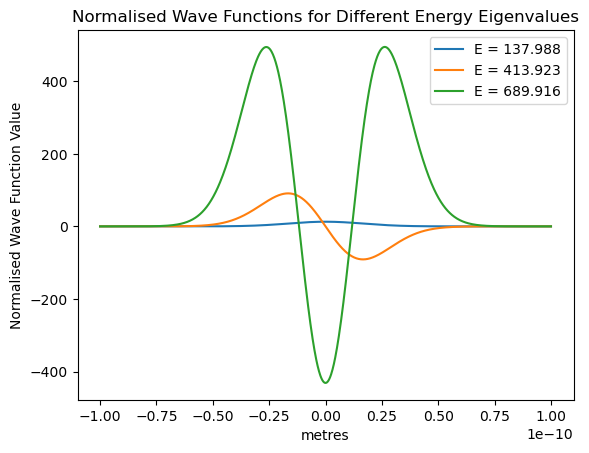

In [16]:
# solution to parts (b), (c)
# YOUR CODE HERE
import matplotlib.pyplot as plt

def eqn_b(x, y, energy):
    psi = y[0]
    u = y[1]
    V0 = 50 #[eV]
    a = 1e-11 #[m]
    a_ev = a * convert_length #[1/eV]
    ydash = np.array([u, -2*me_ev*psi*(energy-V0*(x**2)/(a_ev**2))])
#    print (ydash)
    return ydash

def solve2(energy):
    xrange = np.linspace((-1e-10)*convert_length, (1e-10)*convert_length,1000)
    sol = solve_ivp(eqn_b, ((-1e-10)*convert_length, (1e-10)*convert_length), np.array([0,1]), t_eval = xrange, args = (energy))
    y = sol.y
    global psi
    psi = y[0]
    return psi[-1]

def result():
    return excited2 - excited1

E0 = 150
sol0 = root(solve2, E0)
psi0 = psi
GSE = sol0.x[0]
print (GSE)
E1 = 410
sol1 = root(solve2, E1)
psi1 = psi
excited1 = sol1.x[0]
print (excited1)
E2 = 680
sol2 = root(solve2, E2)
psi2 = psi
excited2 = sol2.x[0]
print (excited2)

print (result())

xvals = np.linspace((-1e-10), (1e-10),1000)
psi0_int = np.trapz((abs(psi0))**2, (xvals*convert_length))
psi0_norm = psi0 / psi0_int
psi1_int = np.trapz((abs(psi1))**2, (xvals*convert_length))
psi1_norm = psi1 / psi1_int
psi2_int = np.trapz((abs(psi2))**2, (xvals*convert_length))
psi2_norm = psi2 / psi2_int


plt.plot(xvals, psi0_norm, label = ("E = " + str(round(GSE,3))))
plt.plot(xvals, psi1_norm, label = ("E = " + str(round(excited1,3))))
plt.plot(xvals, psi2_norm, label = ("E = " + str(round(excited2,3))))
plt.xlabel("metres")
plt.ylabel("Normalised Wave Function Value")
plt.title("Normalised Wave Functions for Different Energy Eigenvalues")
plt.legend()
plt.show()

#plt.plot(xvals, psi0)
#plt.plot(xvals, psi1)
#plt.plot(xvals, psi2)
#plt.show()

Manual plot marking with feedback where appropriate.

In [3]:
# Hidden test for (a). Uses constants as given above - do not rename.

In [4]:
# Test for (b), uses result() function; do not delete

### Tests 2 marks; Plot - 4 marks